In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
with open('save_baselines.pickle', 'rb') as handle:
    baselines = pickle.load(handle)

In [72]:
name_map_map = {'All filters from same checkpoint': 'whole', 
'Filters IID from checkpoints': 'sample_IID',
'Filters IID from VAE': 'vae',
'Filter pixels IID from U[0,1]': 'random'}

In [73]:
name_map = [
    'All filters from same checkpoint',
    'Filters IID from checkpoints',
    'Filters IID from VAE',
    'Filter pixels IID from U[0,1]'
]
# for c in [16]:
#     name_map[f'sample_filters_IID_{c}'] = f'Sample {c} filters, finetune linear layer'

In [59]:
with open('save_baselines.pickle', 'rb') as f:
    res = pickle.load(f)

In [44]:
baselines = {}

In [60]:
baselines['sample_IID'] = res['sample_filters_IID_16']['acc']

In [61]:
baselines['sample_IID'] 

[0.3709,
 0.485,
 0.4826,
 0.2953,
 0.5206,
 0.5398,
 0.4436,
 0.573,
 0.5911,
 0.3921,
 0.3325,
 0.4797,
 0.4322,
 0.6366,
 0.6517,
 0.5644,
 0.3968]

In [62]:
with open('save_baselines_whole.pickle', 'rb') as f:
    res = pickle.load(f)

In [63]:
res['sample_IID']['acc']

[0.6327,
 0.6813,
 0.6628,
 0.7096,
 0.6049,
 0.6864,
 0.7025,
 0.6962,
 0.6914,
 0.7067,
 0.6943,
 0.6873,
 0.6638,
 0.7046,
 0.7014]

In [64]:
baselines['whole'] = res['sample_IID']['acc']

In [65]:
baselines['vae'] = [0.5285,
  0.4408,
  0.5045,
  0.5747,
  0.4813,
  0.5034,
  0.361,
  0.5133,
  0.4781,
  0.3561,
  0.5173,
  0.4679,
  0.5272]

In [66]:
baselines['random'] = [0.4993,
   0.6688,
   0.5848,
   0.6316,
   0.6903,
   0.6805,
   0.5625,
   0.5962,
   0.6084,
   0.3996,
   0.5591,
   0.6846]

All filters from same checkpoint
Filters IID from checkpoints
Filters IID from VAE
Filter pixels IID from U[0,1]


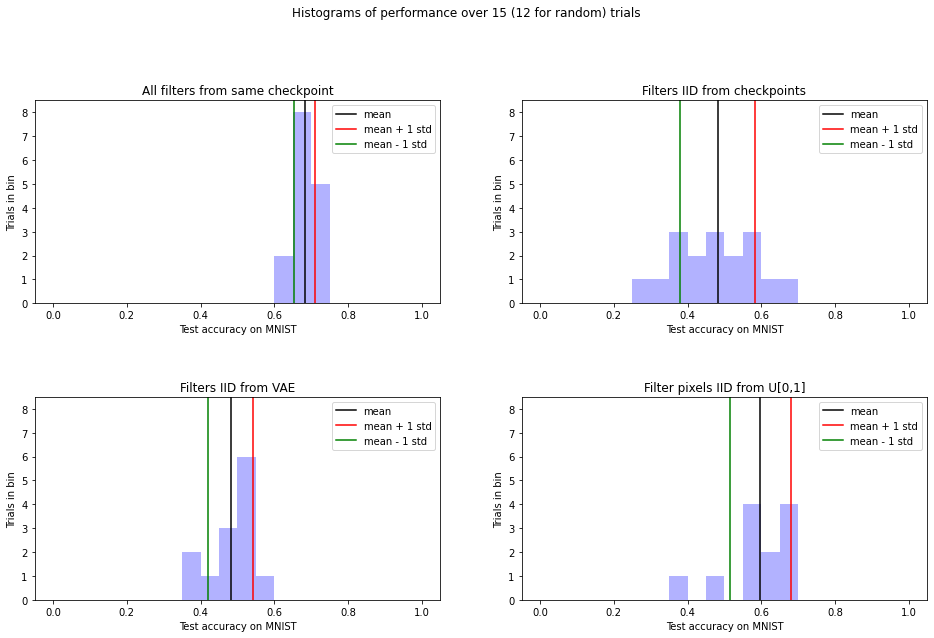

In [75]:
from matplotlib.pyplot import figure

# figure(figsize=(20,10))
fig, axs = plt.subplots(2,2,figsize=(16,10), gridspec_kw={'width_ratios': [2,2],'height_ratios': [1, 1]} )
# print(axs)
plt.suptitle('Histograms of performance over 15 (12 for random) trials')
for name, ax in zip(name_map, axs.flatten()):
    # plt.clf()
    vec = baselines[name_map_map[name]]
    print(name)
    # if len(vec) > 15:
    #     vec = vec[:15]
    ax.hist(vec, bins=20, range=(0,1), fc=(0, 0, 1, 0.3))
    ax.set_box_aspect(0.5)
    ax.axvline(sum(vec)/len(vec), color='black', label='mean')
    std = np.std(vec)
    ax.axvline(sum(vec)/len(vec) + std, color='red', label='mean + 1 std')
    ax.axvline(sum(vec)/len(vec) - std, color='green', label='mean - 1 std')
    ax.set_xlabel('Test accuracy on MNIST')
    ax.set_ylabel('Trials in bin')
    ax.set_ylim(0, 8.5)
    ax.set_title(name)
    ax.legend()
    # plt.show()
